# STA 141B: Homework 3
Winter 2018

## Student Information

After the colons (in the same line) please write just your first name, last name, and the 9 digit student ID number below.

First Name: Mitchell

Last Name: Layton

Student ID: 912307956

## Instructions

We use a script that extracts your answers by looking for cells in between the cells containing the exercise statements.  So you 

- MUST add cells in between the exercise statements and add answers within them and
- MUST NOT modify the existing cells, particularly not the problem statement

To make markdown, please switch the cell type to markdown (from code) - you can hit 'm' when you are in command mode - and use the markdown language.  For a brief tutorial see: https://daringfireball.net/projects/markdown/syntax


## Fruits and Veggies

The US Department of Agriculture publishes price estimates for fruits and vegetables [online](https://www.ers.usda.gov/data-products/fruit-and-vegetable-prices/fruit-and-vegetable-prices/). The most recent estimates are based on a 2013 survey of US retail stores.

The estimates are provided as a collection of MS Excel files, with one file per fruit or vegetable. The `assignment3_data.zip` file contains the fruit and vegetable files in the directories `fruit` and `vegetables`, respectively.

__Exercise 1.1.__ Use pandas to extract the "Fresh" row(s) from the <strong style="color:#B0B">fruit</strong> Excel files. Combine the data into a single data frame. Your data frame should look something like this:

type       | food       | form   | price_per_lb | yield | lb_per_cup | price_per_cup
---------- | ---------- | ------ | ------------ | ----- | ---------- | -------------
fruit      | watermelon | Fresh1 | 0.333412     | 0.52  | 0.330693   | 0.212033
fruit      | cantaloupe | Fresh1 | 0.535874     | 0.51  | 0.374786   | 0.3938
vegetables | onions     | Fresh1 | 1.03811      | 0.9   | 0.35274    | 0.406868
...        |            |        |              |       |            |


It's okay if the rows and columns of your data frame are in a different order. These modules are especially relevant:

* [`str` methods](https://docs.python.org/2/library/stdtypes.html#string-methods)
* [`os`](https://docs.python.org/2/library/os.html)
* [`os.path`](https://docs.python.org/2/library/os.path.html)
* [pandas](http://pandas.pydata.org/pandas-docs/stable/): `read_excel()`, `concat()`, `.fillna()`, `.str`, plotting methods

Ask questions and search the documentation/web to find the functions you need.


In [1]:
import os
import pandas as pd
import numpy as np

def fruit_file(desired_index):
    """
    Function takes the column name of what user would like to index on
    and searches current jupyter directory for "fruit" folder
    
    Input is the desired input to help with developing plots for questions below
    
    Returns:
        A combined pandas dataframe with fruit properly output like above example but indexed on type (sorted by price_per_lb).
    """
    try:
        fruit = os.listdir()[os.listdir().index("fruit")]
    except ValueError:
        print("\n{ERROR: Make sure fruit folder is in current jupyter directory}\n\n")

    # join fruit & name_of_fruit.xlsx for file in the fruit directory if the joined file is a file
    fruits_in_folder = [os.path.join(fruit,f) for f in os.listdir(fruit) if os.path.isfile(os.path.join(fruit,f))]

    
    df = pd.DataFrame()

    for line in fruits_in_folder:
        read_file = pd.read_excel(line, header=None, skiprows=[0,1,2])
        fresh = read_file.iloc[:, 0].str.contains("Fresh").fillna(False)
        data = (read_file.loc[fresh, :])
        data = data.iloc[:,:7]
        data = data.drop([2,5], axis=1)
        data.columns = ["form", "price_per_lb", "yield", "lb_per_cup", "price_per_cup"]
        data.insert(0, "food", line.split("\\")[1].split(".")[0])
        data.insert(0, "type", fruit)
        data = data.set_index(desired_index)
        df = df.append(data)
        df = df.sort_values(by=['price_per_lb'])

    return(df)
 

fruit_file("type")         

,food,form,price_per_lb,yield,lb_per_cup,price_per_cup
type,,,,,,
fruit,watermelon,Fresh1,0.333412,0.52,0.330693,0.212033
fruit,cantaloupe,Fresh1,0.535874,0.51,0.374786,0.3938
fruit,bananas,Fresh1,0.566983,0.64,0.330693,0.292965
fruit,pineapple,Fresh1,0.627662,0.51,0.363763,0.447686
fruit,honeydew,Fresh1,0.796656,0.46,0.374786,0.649077
fruit,grapefruit,Fresh1,0.897802,0.49,0.462971,0.848278
fruit,oranges,Fresh1,1.03517,0.73,0.407855,0.578357
fruit,papaya,Fresh1,1.29801,0.62,0.308647,0.646174
fruit,mangoes,Fresh1,1.37756,0.71,0.363763,0.705783


__Exercise 1.2.__ Reuse your code from exercise 1.1 to extract the "Fresh" row(s) from the <strong style="color:#B0B">vegetable</strong> Excel files.

Does your code produce the correct prices for tomatoes? If not, why not? Do any other files have the same problem as the tomatoes file?

You don't need to extract the prices for these problem files. However, make sure the prices are extracted for files like asparagus that don't have this problem.

In [2]:
def veggie_file(desired_index):
    """
    Function takes the column name of what user would like to index on
    and searches current jupyter directory for "vegetables" folder
    
    Input is the desired input to help with developing plots for questions below
    
    Returns:
        A combined pandas dataframe with veggies properly output like above example but indexed on type (sorted by price_per_lb).
    """
    try:
        veggies = os.listdir()[os.listdir().index("vegetables")]
    except ValueError:
        print("\n{ERROR: Make sure vegetables folder is in current jupyter directory}\n\n")

    # join veggies & name_of_veggie.xlsx for file in the fruit directory if the joined file is a file
    veggies_in_folder = [os.path.join(veggies,v) for v in os.listdir(veggies) if os.path.isfile(os.path.join(veggies,v))]        
    
    
    df = pd.DataFrame()

    for line in veggies_in_folder:
        read_file = pd.read_excel(line, header=None, skiprows=[0,1,2])
        fresh = read_file.iloc[:, 0].str.contains("Fresh").fillna(False)
        data = (read_file.loc[fresh, :])
        data = data.iloc[:,:7]
        data = data.drop([2,5], axis=1)
        data.columns = ["form", "price_per_lb", "yield", "lb_per_cup", "price_per_cup"]
        data.insert(0, "food", line.split("\\")[1].split(".")[0])
        data.insert(0, "type", veggies)
        data = data.set_index(str(desired_index))
        df = df.append(data)
        #df = df.sort_values(by=['price_per_lb'])
        
    return(df)
 

veggie_file("type")  

,food,form,price_per_lb,yield,lb_per_cup,price_per_cup
type,,,,,,
vegetables,acorn_squash,Fresh1,1.17225,0.458554,0.451948,1.155360
vegetables,artichoke,Fresh1,2.21305,0.375309,0.385809,2.274967
vegetables,asparagus,Fresh1,3.21349,0.493835,0.396832,2.582272
vegetables,avocados,Fresh1,2.23587,0.740753,0.31967,0.964886
vegetables,broccoli,Fresh,,,,NaN
vegetables,brussels_sprouts,Fresh1,2.76355,1.06,0.341717,0.890898
vegetables,butternut_squash,Fresh1,1.24474,0.714,0.451948,0.787893
vegetables,cabbage,Fresh green cabbage1,0.579208,0.778797,0.330693,0.245944
vegetables,cabbage,Fresh red cabbage1,1.05645,0.779107,0.330693,0.448412


The reason for "tomatoes" having NaN's in all of the numerical columns is because we are extracting the "Fresh" variables from the form column of vegetables, and when we look at the Excel file for tomatoes, we notice that the "Fresh column has no row data. Rather there are other variables listed under tomatoes "Fresh" that have accompanying numerical data. 

In the case of tomatoes these include, "Grape and cherry", "Roma", and "Beefsteak".
In the case of spinach these include, "Boiled" and "Raw"
 
(See cabbage (red & green) in vegetable table)

__Exercise 1.3.__ Remove rows without a price from the vegetable data frame and then combine the fruit and vegetable data frames. Make sure all columns of numbers are numeric (not strings).

In [3]:
# Remove Nan and empty values from vegetables dataframe
v = veggie_file("form").dropna(axis = 'rows')

# create a list of both of the data frames, concact them, the sort by column 'food'
Frt_and_Veg = pd.concat([fruit_file("form"),v]).sort_values(by = ['food'])


# Decided to implement a check for all numeric columns and their elements to see if they are indeed numeric (float).
# Function will break if at least one column is str.
test = list(Frt_and_Veg)[2:]
temp1 = []
for i in test:
    temp2 = []
    for j in Frt_and_Veg[i]:
        temp2.append(isinstance(j,float))
    temp1.append(temp2)

# Checks for any false instances of numerical columns    
for i in temp1:
    for j in i:
        if j == False:
            print("Not numeric")
        else:
            break

# Indexed on "form" so I can easily grab the "type" column when answering question 2 below for visualizations
Frt_and_Veg     

,type,food,price_per_lb,yield,lb_per_cup,price_per_cup
form,,,,,,
Fresh1,vegetables,acorn_squash,1.17225,0.458554,0.451948,1.15536
Fresh1,fruit,apples,1.56752,0.9,0.242508,0.422373
Fresh1,fruit,apricots,3.04007,0.93,0.363763,1.1891
Fresh1,vegetables,artichoke,2.21305,0.375309,0.385809,2.27497
Fresh1,vegetables,asparagus,3.21349,0.493835,0.396832,2.58227
Fresh1,vegetables,avocados,2.23587,0.740753,0.31967,0.964886
Fresh1,fruit,bananas,0.566983,0.64,0.330693,0.292965
Fresh1,fruit,blackberries,5.77471,0.96,0.31967,1.92292
Fresh1,fruit,blueberries,4.73462,0.95,0.31967,1.59318


__Exercise 1.4.__ Discuss the questions below (a paragraph each is sufficient). Use plots to support your ideas.

* What kinds of fruits are the most expensive (per pound)? What kinds are the least expensive?
* How do the price distributions compare for fruit and vegetables?
* Which foods are the best value for the price?
* What's something surprising about this data set?
* Which foods do you expect to provide the best combination of price, yield, and nutrition? A future assignment may combine this data set with another so you can check your hypothesis.

Q1)  Which kinds of fruits are the most expensive / leaset expensive (per pound)?

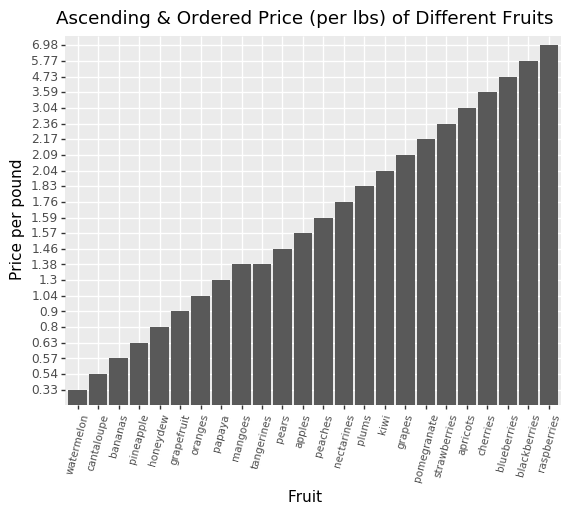

<ggplot: (-9223371837523550727)>

In [5]:
import plotnine as gg
from plotnine.data import *

fruits = fruit_file("type")
fruits.iloc[:,2:7] = fruits.iloc[:,2:7].astype(float).round(2) 
one = fruits[['food','price_per_lb']]
names = one['food']

p = gg.ggplot(fruits, gg.aes("food", "price_per_lb")) + gg.geom_col()
p + gg.theme_bw()
(p + gg.scale_x_discrete(limits = names) 
 + gg.theme(axis_text_x = gg.element_text(size = 7.5, angle = 75)) 
 + gg.labs(title = "Ascending & Ordered Price (per lbs) of Different Fruits", x = "Fruit", y = "Price per pound")
)



(#1 Answer): As we can see, the berries such as raspberries, blackberries, and blueberries are the fruits that cost the most per pound. This may seem pretty obvious to those who have experience with fruit, since these are fruits that become spoiled much faster than other fruits that have more protective skins and exteriors. 

Comparitively, the fruits that cost the least are fruits that are able to withstand a little harsher environments. Further they are fruit that also become tastier the more they are able to ripen, whereas the berries would just become spoiled. For example, people prefer baking banana bread with overly ripe bananas due to the higher sugar flavor and complexity after the ripening process. At #1 and #2 lowest costs per pound, watermelon and cantelope have a protective exterior and tough skins.

Q2) How do the price distributions compare for fruit and vegetables?


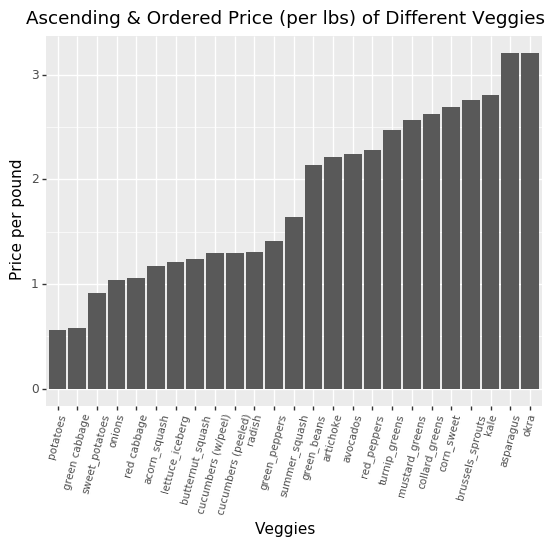

<ggplot: (-9223371837523545463)>

In [6]:
veggies = veggie_file("type").dropna(axis = 'rows')
veggies = veggies.sort_values(by = ["price_per_lb"])
veggies.iloc[:,2:7] = veggies.iloc[:,2:7].astype(float).round(2) 


veggies.iloc[1,0] = "green cabbage"
veggies.iloc[4,0] = "red cabbage"
veggies.iloc[8,0] = "cucumbers (w/peel)"
veggies.iloc[9,0] = "cucumbers (peeled)"

two = veggies[['food','price_per_lb']]
veg_names = two['food']
veg_names
veg_price = two["price_per_lb"]

p = gg.ggplot(veggies, gg.aes("food", "price_per_lb")) + gg.geom_col()
p + gg.theme_bw() 
(p + gg.scale_x_discrete(limits = veg_names)
+ gg.theme(axis_text_x = gg.element_text(size = 7.5, angle = 75)) 
 + gg.labs(title = "Ascending & Ordered Price (per lbs) of Different Veggies", x = "Veggies", y = "Price per pound")
)


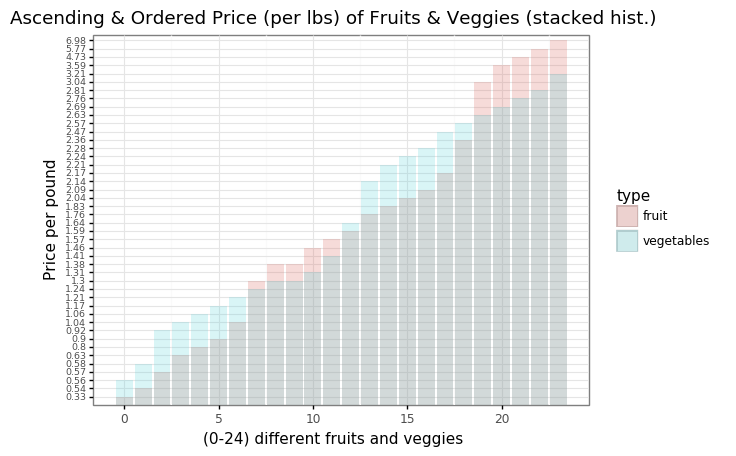

<ggplot: (199331240582)>

In [7]:
veggies_described = veggies["price_per_lb"].describe()

# For some reason fruits.describe() was giving me rows "count, unique, top, freq" despite all being numerical floats.

_1 = len(fruits)
_2 = sum(fruits["price_per_lb"])/len(fruits)
_3 = fruits["price_per_lb"].std()
_4 = min(fruits["price_per_lb"])
_5 = fruits["price_per_lb"].quantile(q = .25)
_6 = fruits["price_per_lb"].quantile(q = .50)
_7 = fruits["price_per_lb"].quantile(q = .75)
_8 = max(fruits["price_per_lb"])

fruit_described = pd.DataFrame([_1,_2,_3,_4,_5,_6,_7,_8],['count','mean','std','min','25%','50%','75%','max'])
fruit_described.columns = ['price_per_lb']
veggies_described = pd.DataFrame(veggies_described)

fru = fruit_file("form")
fru = fru.sort_values(by = ["price_per_lb"])
fru.iloc[:,2:7] = fru.iloc[:,2:7].astype(float).round(2) 


veg = veggie_file("form").dropna(axis = 'rows')
veg = veg.sort_values(by = ["price_per_lb"])
veg.iloc[:,2:7] = veg.iloc[:,2:7].astype(float).round(2) 


f = fru.iloc[:,0:3:2]
f.insert(2, "key", range(len(f)))
v = veg.iloc[:,0:3:2]
v.insert(2, "key", range(len(v)))
v = v.iloc[0:24]
result1 = pd.concat([f,v])
result1

p = (gg.ggplot(result1, gg.aes('key', 'price_per_lb', fill ='type')) + gg.geom_col(alpha = .225, position='identity'))
p + gg.theme_bw() + gg.theme(axis_text_y = gg.element_text(size = 6.8)) + gg.labs(title = "Ascending & Ordered Price (per lbs) of Fruits & Veggies (stacked hist.)", x = "(0-24) different fruits and veggies", y = "Price per pound")


(#2 Answer): The overlaying histgram above shows the fruits and vegetables in ascending order, based on their price per pound in the y-axis, and their keys in the previous created dataframe (each fruit/vegetable given a key 0-23 based on ascending order). The gray parts of the histogram resembles the overlapping of price points for similarly price fruits/veggies respectively. In general, we notice a couple of fluctuations between the fruits and vegetables. The distribution starts with vegetables at the lower price spectrum being priced higher in general compared to fruits, then swapping in the middle of the distribution, and lastly switching back again at the tail end of the distribution. In general, one may say that the highest price per pound food is fruits, showing the last 4 most expensive fruits shooting over the vegetables. Interestingly, the vegetables at lower price points are more costly than fruits at lower cost points.

Q3) Which foods are the best value for the price?

For this question, I will look at the minimum values after taking price_per_lb and dividing it by lb_per_cup, so that we find the cheapest fruit/veggie, while getting the most from the food. So we shall minimize the price to weight ratio. This will give us the lowest price per cup, since the (lb) will cancel.

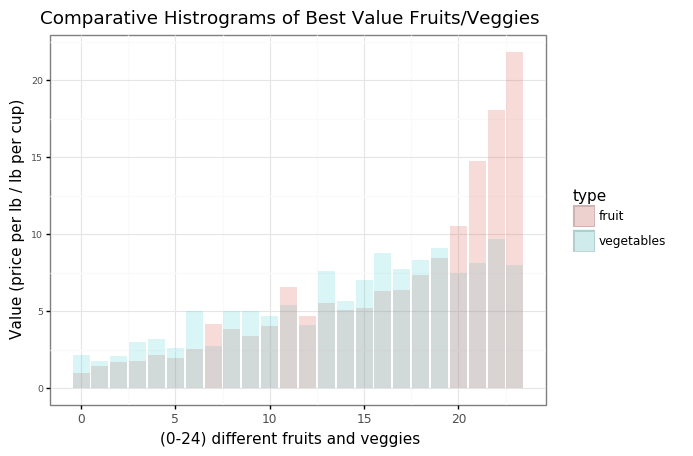

<ggplot: (199331308615)>

In [8]:
value_f = fru
value_f = value_f.iloc[:, [0,1,2,3,4]]
value_f.insert(0, "key", range(len(value_f)))

value_v = veg
value_v = value_v.iloc[:, [0,1,2,3,4]][0:24]
value_v.insert(0, "key", range(len(value_v)))

result2 = pd.concat([value_f,value_v])
result2['value'] = result2['price_per_lb']/result2['lb_per_cup']
result2.iloc[:,6] = result2.iloc[:,6].astype(float).round(2)
result2 = result2.sort_values(by=['value'])

# for below
value_result = result2.iloc[:5,[1,2,5]]


# plot of value. (SMALLEST = HIGHEST VALUE) 
p = (gg.ggplot(result2, gg.aes('key', 'value', fill ='type')) + gg.geom_col(alpha = .225, position='identity'))
p + gg.theme_bw() + gg.theme(axis_text_y = gg.element_text(size = 6.8)) + gg.labs(title = "Comparative Histrograms of Best Value Fruits/Veggies", x = "(0-24) different fruits and veggies", y = "Value (price per lb / lb per cup)")



In [9]:
# Table visuals of the 5 best value fruits/vegetables
value_result

,type,food,lb_per_cup
form,,,
Fresh1,fruit,watermelon,0.33
Fresh1,fruit,cantaloupe,0.37
Fresh1,fruit,bananas,0.33
Fresh1,fruit,pineapple,0.36
Fresh green cabbage1,vegetables,cabbage,0.33


(#3 Answer): As we can see from the graph above, the comparative histograms clearly shows that the first few fruits (the gray bars below the blue veggie bar) have the most value. These fruits have the lowest cost of price per cup.

Furthermore, from the table we can see that the watermelon and cantaloupe, as mentioned in previous explanations, have a strong protective shell on the exterior, while providing great quantities of densely packed fruit. Lastly, we can see that is also the case for bananas and pinneapple and cabbage for the vegetable case, where they do not need high maintenance and provide good quantities of fruit/veggies accordingly.

Q4) What's something surprising about this data set?

(#4 Answer): Something that is surprising about this data set to me is the high price point of okra. I've known and had okra a few times throughout my lifetime and I understand that it is quite common in Souther cuisine. That being said, after looking at the vegetable itself, it seems like it has a strong structure to it and is resilient. I would not have guessed it to be the highest price per pound. The biggest contributor to this fact must be the overall lack of demand of the vegetable, despite being known by most people. 

Q5) Which foods do you expect to provide the best combination of price, yield, and nutrition? A future assignment may combine this data set with another so you can check your hypothesis.

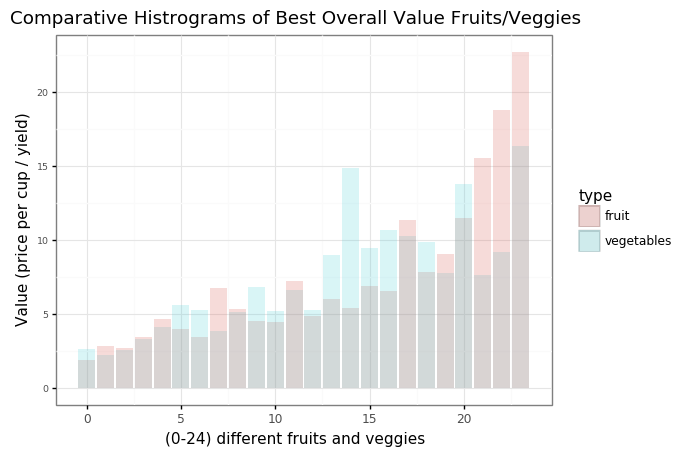

<ggplot: (-9223371837522872565)>

In [12]:
# Going to use my previously created value metric to create another value metric that takes into account yield
# Obviously we do not have a quantitative variable of nutrition but it should give us a closer look.


overall = result2
overall['overall'] = overall['value']/overall['yield']
overall.iloc[:,7] = overall.iloc[:,7].astype(float).round(2)
overall = overall.sort_values(by=['overall'])


# for later
overall_result = overall.iloc[:5,[1,2,7]]

# plot of value. (SMALLEST = HIGHEST OVERALL VALUE) 
p = (gg.ggplot(overall, gg.aes('key', 'overall', fill ='type')) + gg.geom_col(alpha = .225, position='identity'))
p + gg.theme_bw() + gg.theme(axis_text_y = gg.element_text(size = 6.8)) + gg.labs(title = "Comparative Histrograms of Best Overall Value Fruits/Veggies", x = "(0-24) different fruits and veggies", y = "Value (price per cup / yield)")



(#5 Answer): Going off of my value metric created and shown previously, if any of the top fruit or vegetables in the table above have a high yield point, then they may be great candidates for the combination of all of the variables. 

That being said, I created a new overall value metric, where I took the previously value metric (price per cup) and divided that by the yield of each respective fruit/veggie.

The lowest values will be the highest overall value (exlcuding data from nutrition, but we will use intuition). 
These values are shown below in the table.

We may notice watermelon, cabbage, and bananas are still in the top 5 in overall value from the previously value metric. Now if we use some intuition, we may say all of these are candidates for the overall best value. But for those who want way more healthier options like kale and spinach, we could take a further look to see the best overall value for something like superfoods.

In [13]:
overall_result

,type,food,overall
form,,,
Fresh1,fruit,watermelon,1.92
Fresh green cabbage1,vegetables,cabbage,2.26
Fresh1,vegetables,sweet_potatoes,2.58
Fresh1,vegetables,potatoes,2.65
Fresh1,fruit,bananas,2.70
